In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/commission-lobbists-meetings.csv")
df.head()

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,"Ladislav Miko, Director-General",Director-General of Health and Food Safety (SA...,15/04/2015,"Brussels, BELGIUM",Seeds,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,NaN,NaN,NaN
1,2,"Arunas Ribokas, Cabinet member of Vytenis Andr...",Health & Food Safety,30/01/2015,Brussels,"The Food Chain, Innovation and Challenges, Foo...","ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,NaN,NaN,NaN
2,3,"Nathalie Chaze, Cabinet member of Vytenis Andr...",Health & Food Safety,6/01/2015,Brussels,Plant Reproductive Material Proposal,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,NaN,NaN,NaN
3,1,"Roberto Viola, Director-General","Director-General of Communications Networks, C...",21/02/2019,Brussels,Quantum Technologies,Austrian Institute of Technology GmbH (AIT),False,NaN,NaN,NaN
4,2,"Mariya Gabriel, Commissioner",Digital Economy and Society,8/01/2019,Sofia,"Cloud computing, Cybersecurity",Austrian Institute of Technology GmbH (AIT),False,NaN,NaN,NaN


In [3]:
print(df["Unnamed: 8"].nunique())
print(df["Unnamed: 9"].nunique())
print(df["Unnamed: 10"].nunique())

0
0
1


In [4]:
# To avoid copy-paste:
for num in range(8, 11):
    col_name = f"Unnamed: {num}"  # "f-strings" https://realpython.com/python-f-strings/
    print(col_name, df[col_name].nunique())

Unnamed: 8 0
Unnamed: 9 0
Unnamed: 10 1


What happens with the last column?

In [5]:
df["Unnamed: 10"].value_counts()

15/03/2021    1
Name: Unnamed: 10, dtype: int64

In [6]:
df.loc[df["Unnamed: 10"] == "15/03/2021"]

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab,Unnamed: 8,Unnamed: 9,Unnamed: 10
12004,4,"Isabelle Perignon, Cabinet member of Didier Re...",Justice,17/12/2020,video conferencing,consumer policy and green pledges,Nestlé S.A. (Nestlé (SIX/ NESN)),False,NaN,NaN,15/03/2021


In [7]:
# Or, alternatively (we haven't seen .notnull() yet, but worth noting)
df.loc[df["Unnamed: 10"].notnull()]

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab,Unnamed: 8,Unnamed: 9,Unnamed: 10
12004,4,"Isabelle Perignon, Cabinet member of Didier Re...",Justice,17/12/2020,video conferencing,consumer policy and green pledges,Nestlé S.A. (Nestlé (SIX/ NESN)),False,NaN,NaN,15/03/2021


Looks like an error of some sort, drop `Unnamed: 10` too.

Several ways of dropping the columns:

In [8]:
#df = df.drop(columns=[f"Unnamed: {num}" for num in range(8, 11)])
#df = df.drop([f"Unnamed: {num}" for num in range(8, 11)], axis=1)

In [9]:
#for col_name in df:
#    if df[col_name].nunique() <= 1:
#        df = df.drop(col_name, axis=1)

In [10]:
# This would work for Unnamed: 8 and 9, but not 10
#df.dropna(axis=1, how="all")

In [11]:
df = df.loc[:, :"health_meeting_or_lab"]
df.head()

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab
0,1,"Ladislav Miko, Director-General",Director-General of Health and Food Safety (SA...,15/04/2015,"Brussels, BELGIUM",Seeds,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False
1,2,"Arunas Ribokas, Cabinet member of Vytenis Andr...",Health & Food Safety,30/01/2015,Brussels,"The Food Chain, Innovation and Challenges, Foo...","ARCHE NOAH, Gesellschaft für die Erhaltung der...",False
2,3,"Nathalie Chaze, Cabinet member of Vytenis Andr...",Health & Food Safety,6/01/2015,Brussels,Plant Reproductive Material Proposal,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False
3,1,"Roberto Viola, Director-General","Director-General of Communications Networks, C...",21/02/2019,Brussels,Quantum Technologies,Austrian Institute of Technology GmbH (AIT),False
4,2,"Mariya Gabriel, Commissioner",Digital Economy and Society,8/01/2019,Sofia,"Cloud computing, Cybersecurity",Austrian Institute of Technology GmbH (AIT),False


Most common lobbyists:

In [12]:
(
    df["lobbyist"]
    .value_counts()
    .nlargest(10)  # .head(10) would also work in this case
                   # because .value_counts() sorts the result
)

Google                                                                                 250
Bureau Européen des Unions de Consommateurs (BEUC)                                     189
Transport and Environment (European Federation for Transport and Environment) (T&E)    155
WWF European Policy Programme (WWF EPO)                                                151
DIGITALEUROPE (DE)                                                                     151
Microsoft Corporation                                                                  144
American Chamber of Commerce to the European Union (AmCham EU)                         144
EuroCommerce                                                                           138
European farmers (COPA)                                                                137
Vodafone Belgium SA (VBSA)                                                             123
Name: lobbyist, dtype: int64

In [13]:
df["portfolio"].value_counts().head(10)

Digital Economy and Society                                                                               692
Health & Food Safety                                                                                      688
Jobs, Growth, Investment and Competitiveness                                                              687
Agriculture & Rural Development                                                                           520
Digital Single Market                                                                                     507
President                                                                                                 494
Trade                                                                                                     417
European Green Deal                                                                                       400
Internal Market, Industry, Entrepreneurship and SMEs                                                      395
Better Reg

In [14]:
(
    df["subject(s)-edited"]
    .str[:100]  # Trim length for presentation purposes only
    .value_counts()
    .head(10)
)

DSM                                                                                                     163
Digital Single Market                                                                                   132
Circular Economy                                                                                        103
Video call with Pharmaceutical Industrial Associations, the European Medicines Agency and the Europe     79
Business discussion                                                                                      74
Meeting with the Task Force for the Preparation and Conduct of the Negotiations with the United King     63
Alcohol labelling                                                                                        60
Energy Union                                                                                             47
Video call with Pharmaceutical Industrial Associations and the European Medicines Agency to discuss      42
Copyright                   

In [15]:
df["portfolio"].nunique()

101

In [16]:
df["subject(s)-edited"].nunique()

8012

In [17]:
google_subjects = df.loc[df["lobbyist"] == "Google", ["portfolio", "subject(s)-edited"]]
google_subjects.head()

,portfolio,subject(s)-edited
11246,Values and Transparency,Disinformation COVID -19
11247,Internal Market,Cloud
11248,Values and Transparency,"EDAP,DSA"
11249,Values and Transparency,EDAP
11250,Internal Market,Roundtable with platforms on DSA and DMA


In [18]:
# To see the most common (portfolio, subject) pairs:
google_subjects.value_counts().nlargest(10)

portfolio                               subject(s)-edited        
Digital Economy and Society             Copyright                    4
                                        DSM                          4
Education, Culture, Youth and Sport     Digital Single Market        4
President                               Digital Single Market        3
Justice, Consumers and Gender Equality  Code of Conduct              3
Security Union                          Cyber security               3
Digital Single Market                   Copyright                    3
Education, Culture, Youth and Sport     ICT in education             3
                                        Google News and Copyright    2
Security Union                          Cybersecurity                2
dtype: int64

In [19]:
# Most common portfolios and subjects, separately
google_subjects["portfolio"].value_counts().nlargest(10)

Digital Economy and Society                                                      32
Justice, Consumers and Gender Equality                                           28
Digital Single Market                                                            26
Education, Culture, Youth and Sport                                              19
Director-General of Communications Networks, Content and Technology (CONNECT)    11
Values and Transparency                                                           9
Internal Market, Industry, Entrepreneurship and SMEs                              9
Jobs, Growth, Investment and Competitiveness                                      9
Agriculture & Rural Development                                                   8
Internal Market                                                                   8
Name: portfolio, dtype: int64

In [20]:
# Most common portfolios and subjects, separately
google_subjects["subject(s)-edited"].value_counts().nlargest(10)

Digital Single Market      12
Copyright                   9
DSM                         4
Business Europe CEO day     4
Digital skills              3
ICT in education            3
Disinformation              3
Code of Conduct             3
Cyber security              3
Cybersecurity               2
Name: subject(s)-edited, dtype: int64

In [21]:
lobbyists = df["lobbyist"].str.lower()

In [22]:
# Apparently, no other FAANG companies in this list
lobbyists.str.contains("amazon").any()

False

In [23]:
lobbyists.str.contains("apple").any()

False

In [24]:
lobbyists.str.contains("netflix").any()

False

In [25]:
lobbyists.str.contains("facebook").any()

False

In [26]:
# But!
lobbyists.str.contains("microsoft").any()

True

In [27]:
df.loc[df["lobbyist"].str.lower().str.contains("microsoft"), "lobbyist"].unique()

array(['Microsoft Corporation'], dtype=object)

So, instead of calling it `is_faang`, let's call it `is_bigtech`:

In [28]:
df["is_bigtech"] = (
    df["lobbyist"].str.lower().str.contains("google")
    | df["lobbyist"].str.lower().str.contains("microsoft")
)
df.loc[df["is_bigtech"]].head()

,nr,commission_representative,portfolio,date,location,subject(s)-edited,lobbyist,health_meeting_or_lab,is_bigtech
11246,1,"Věra Jourová, Vice-President",Values and Transparency,22/02/2021,Videoconference,Disinformation COVID -19,Google,True,True
11247,2,"Fabrice Comptour, Cabinet member of Thierry Br...",Internal Market,15/01/2021,Videoconference,Cloud,Google,False,True
11248,3,"Renate Nikolay, Cabinet member of Věra Jourová...",Values and Transparency,16/12/2020,videoconference,"EDAP,DSA",Google,False,True
11249,4,"Věra Jourová, Vice-President",Values and Transparency,7/12/2020,videoconference,EDAP,Google,False,True
11250,5,"Thierry Breton, Commissioner;Filomena Chirico,...",Internal Market,2/12/2020,Videoconference,Roundtable with platforms on DSA and DMA,Google,False,True


In [29]:
print(df["location"].unique().tolist())

['Brussels, BELGIUM', 'Brussels', 'Sofia', 'Brusselse', 'Brussels, Belgium', 'webex', 'Virtual meeting', 'Brussels - virtual', 'Brussels, BERL', 'video-call', 'Conference call', 'Videoconference', 'Berlaymont 8th floor', 'Virtual', 'virtual', 'Conference Call', 'VC meeting', 'Linz', 'Belgium, Brussels, BERL', 'videoconference (Brussels)', 'Brussels - video conference', 'Brussels/online', 'Brussels Belguim', 'BRUSSELS', 'Virtual Presentation', 'Video Conferencing', 'Virtual call', 'Hong Kong', 'BERL', 'video-conferencing', 'Video conference (skype)', 'Sassenheim', 'Video-conference', 'Brussels, BE', 'video conference', 'Video conference', 'teleconference', 'videoconference', 'Brussels (VC)', 'Bruxelles', 'videocall', 'Video Conference', 'video- conferencing', 'video conference (Brussels)', 'Video - conferencing', 'video conferencing', 'virutal', 'Brussels - videoconference', 'Ireland', 'Avenue des Arts 53', 'Stuttgart', 'Milan', 'Washington DC', 'Berlaymont', 'Amcham', 'Brussels - EC pr

In [30]:
df["is_remote"] = (
    df["location"]
    .str.lower()
    .str.contains(
        "video|conference|online|virtual|zoom|webex|skype",  # Instead of chaining several long conditions, you can use regular expressions!
        na=False,  # If the location is unknown, assume is not remote
    )
)

In [31]:
df["is_remote"].value_counts()

False    10343
True      1682
Name: is_remote, dtype: int64

In [32]:
subjects_by_portfolio = df.groupby("portfolio")["subject(s)-edited"].nunique()
subjects_by_portfolio.nlargest(3)

portfolio
Jobs, Growth, Investment and Competitiveness    481
Health & Food Safety                            404
Agriculture & Rural Development                 353
Name: subject(s)-edited, dtype: int64

In [33]:
subjects_by_portfolio.nsmallest(3)

portfolio
Acting Director-General of Justice and Consumers (JUST)    1
Director-General of Publications Office(OP)                1
Director-General of Structural Reform Support (REFORM)     1
Name: subject(s)-edited, dtype: int64

In [34]:
(
    df
    .assign(date=pd.to_datetime(df["date"], infer_datetime_format=True))
    .set_index("date")
).head()

,nr,commission_representative,portfolio,location,subject(s)-edited,lobbyist,health_meeting_or_lab,is_bigtech,is_remote
date,,,,,,,,,
2015-04-15,1,"Ladislav Miko, Director-General",Director-General of Health and Food Safety (SA...,"Brussels, BELGIUM",Seeds,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,False,False
2015-01-30,2,"Arunas Ribokas, Cabinet member of Vytenis Andr...",Health & Food Safety,Brussels,"The Food Chain, Innovation and Challenges, Foo...","ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,False,False
2015-01-06,3,"Nathalie Chaze, Cabinet member of Vytenis Andr...",Health & Food Safety,Brussels,Plant Reproductive Material Proposal,"ARCHE NOAH, Gesellschaft für die Erhaltung der...",False,False,False
2019-02-21,1,"Roberto Viola, Director-General","Director-General of Communications Networks, C...",Brussels,Quantum Technologies,Austrian Institute of Technology GmbH (AIT),False,False,False
2019-01-08,2,"Mariya Gabriel, Commissioner",Digital Economy and Society,Sofia,"Cloud computing, Cybersecurity",Austrian Institute of Technology GmbH (AIT),False,False,False


<AxesSubplot:xlabel='date'>

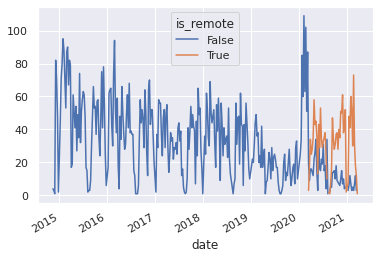

In [35]:
# Advanced!
import seaborn as sns
sns.set()

(
    df
    .assign(date=pd.to_datetime(df["date"], infer_datetime_format=True))
    .set_index("date")
    .resample("W")
    ["is_remote"]
    .value_counts()
    .unstack()
    .plot()
)